In [69]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

from sklearn.model_selection import train_test_split
import skimage.transform as skt
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import skimage.transform as skt
import os
#import xgboost as xgb
import skimage.io as skim
import tensorflow as tf
from tools import *

#%matplotlib inline
import cv2
import math

In [70]:
train_target = pd.read_csv('train.csv')
test_meta = pd.read_csv('test.csv')

train_path = train_target['filename']
test_path = test_meta['filename']
labels = list(set(train_target['label'].to_list()))
labels

['viral', 'bacterial', 'covid', 'normal']

In [71]:
images = {}
data = train_target #if type == "train" else test_meta
for _, row in tqdm(data.iterrows(), desc="Loading %s data" % type, leave = False):
            
    # Read image
    id, filename = row['id'], row['filename']
    image = cv2.imread(row['filename'], 0)
    if type == "train":
        images[id] = {
            "data": image,
            "label": row['label']
        }
    else:
         images[id] = {
             "data": image,
             "label": row['label']
         }
data = pd.DataFrame.from_dict(images, orient='index')
#data.to_pickle(pickle_path)
data

,data,label
0,"[[100, 90, 79, 73, 70, 66, 66, 69, 73, 73, 73,...",normal
1,"[[110, 130, 128, 124, 141, 142, 130, 132, 142,...",viral
2,"[[119, 119, 118, 116, 114, 112, 109, 108, 104,...",viral
3,"[[5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6,...",bacterial
4,"[[109, 108, 106, 107, 108, 109, 108, 106, 109,...",viral
...,...,...
1122,"[[192, 196, 195, 183, 167, 151, 135, 122, 118,...",normal
1123,"[[28, 29, 30, 31, 33, 34, 36, 36, 33, 33, 33, ...",bacterial
1124,"[[134, 136, 140, 143, 146, 147, 148, 148, 145,...",bacterial
1125,"[[113, 111, 108, 104, 101, 100, 99, 99, 98, 98...",covid


In [39]:
#train_target = pd.read_csv('train.csv')

train_ims = [os.path.join('data/train',f) for f in os.listdir('data/train')]
train_ims_sorted = sorted(train_ims)  

#train_target.head()
train_ims

['data/train/.DS_Store', 'data/train/train']

In [40]:
x = [skim.imread(im) for im in train_path.to_list()]

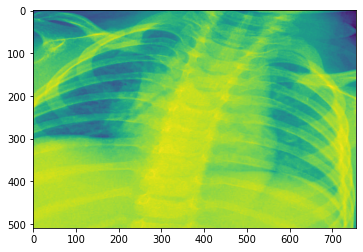

In [29]:
plt.imshow(x[900])

In [79]:
def encode_label(label):
        return labels.index(label)
    
    # Create training rows by flattening the images and record training labels
Xt = []
yt = []
for i, train_row in data.iterrows():
    Xt.append(train_row['data'].flatten())
    yt.append(encode_label(train_row['label']))

Xt = np.array(Xt)
yt = np.array(yt)

    # Create testing rows
#test_X = []
#test_y = []
    
#for i, test_row in test_data.iterrows():
#    test_X.append(test_row['data'].flatten())
#    test_y.append(encode_label(test_row['label']))
    
# Normalize the data
Xt /= 255
#test_X /= 255
    
#input_size = Xt.shape[1]
#output_size = yt.shape[1]

[3 0 0 ... 1 2 1]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.2, random_state=123)

In [ ]:
labels = list(set(train_target['label'].to_list()))
num_classes = len(labels)
label_guide = {k:labels[k] for k in range(num_classes)}
reverse_label_guide = {label_guide[k]:k for k in label_guide.keys()}
print(label_guide)
print(reverse_label_guide)
y = [reverse_label_guide[i] for i in train_target['label'].to_list()]
print(y[:5])

y_targ = train_target['label']
y_targ = np.array(y_targ)
labels = np.array(labels)
print(y_targ)

In [18]:
x = []
for im in train_ims_sorted:
    i = ski.imread(im)
    i = skt.resize(i,[224,224,3])
    x.append(i)

IndexError: list index out of range

In [ ]:
df = plt.imread(train_ims)

In [ ]:
ohe_labels = np.zeros((len(y_targ), num_classes))  #one-hot encode target labels

In [ ]:
# one-hot encoding the labels
for ii in range(len(y_targ)):
    jj = np.where(labels == y_targ[ii])
    ohe_labels[ii, jj] = 1
ohe_labels

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x,y)
X_train = prep_x_values(X_train)
X_val = prep_x_values(X_val)
y_train = prep_y_values(y_train,num_classes=num_classes)
y_val = prep_y_values(y_val,num_classes=num_classes)
print(X_train.shape,len(y_train),y_train[0])

In [ ]:
z = []
for im in train_ims_sorted:
    i = skim.imread(im)
    i = skt.resize(i,[224,224,3])
    z.append(i)